In [1]:
# Import libraries
import numpy as np
import pandas as pd

Source for df1 from IEEE DataPort: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

In [2]:
#Load data
df1=pd.read_csv("dataset/IEEE Dataset Heart Disease.csv")
df1.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Source for df2 from UC Irvine Machine Learning Repository:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [3]:
df2=pd.read_csv("dataset/UCI Dataset Heart Disease.csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Scrub – Data Cleaning

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Description of df2's columns
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [6]:
#Drop unwanted column
df2.drop(columns=['ca','thal'], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  target    1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [7]:
# Rename the columns of df2
column_mapping = {
    'cp': 'chest pain type',
    'trestbps': 'resting bp s',
    'chol': 'cholesterol',
    'fbs': 'fasting blood sugar',
    'restecg': 'resting ecg',
    'thalach': 'max heart rate',
    'exang': 'exercise angina',
    'slope': 'ST slope'
}

# Rename the columns of df2
df2.rename(columns=column_mapping, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   chest pain type      1025 non-null   int64  
 3   resting bp s         1025 non-null   int64  
 4   cholesterol          1025 non-null   int64  
 5   fasting blood sugar  1025 non-null   int64  
 6   resting ecg          1025 non-null   int64  
 7   max heart rate       1025 non-null   int64  
 8   exercise angina      1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  ST slope             1025 non-null   int64  
 11  target               1025 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 96.2 KB


In [8]:
df1['age'].value_counts()

age
54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
48    38
61    38
63    37
41    33
50    32
64    31
43    31
46    31
44    29
65    29
49    27
42    26
45    25
67    23
47    23
66    19
39    18
38    17
69    16
40    16
35    14
37    13
68    13
70    11
34     9
74     8
71     8
36     6
32     5
72     4
29     4
77     3
75     3
76     3
33     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [9]:
df2['age'].value_counts()

age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64

In [10]:
df1['sex'].value_counts()

sex
1    909
0    281
Name: count, dtype: int64

In [11]:
df2['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [12]:
df1['chest pain type'].value_counts()

chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

In [13]:
df2['chest pain type'].value_counts()

chest pain type
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [14]:
# Replace values in the 'chest pain type' column
df2['chest pain type'] = df2['chest pain type'].replace({0: 1, 1: 2, 2: 3, 3: 4})

df2['chest pain type'].value_counts()

chest pain type
1    497
3    284
2    167
4     77
Name: count, dtype: int64

In [15]:
df1['cholesterol'].value_counts()

cholesterol
0      172
254     16
234     13
211     13
204     13
      ... 
385      1
466      1
129      1
338      1
131      1
Name: count, Length: 222, dtype: int64

In [16]:
# Clear rows where 'cholesterol' column is equal to 0
df1 = df1[df1['cholesterol'] != 0]

In [17]:
df1['cholesterol'].value_counts()

cholesterol
254    16
211    13
234    13
204    13
230    12
       ..
384     1
458     1
328     1
316     1
131     1
Name: count, Length: 221, dtype: int64

In [18]:
df2['cholesterol'].value_counts()

cholesterol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64

In [19]:
df1['resting ecg'].value_counts()

resting ecg
0    577
2    313
1    128
Name: count, dtype: int64

In [20]:
df2['resting ecg'].value_counts()

resting ecg
1    513
0    497
2     15
Name: count, dtype: int64

In [21]:
df1['exercise angina'].value_counts()

exercise angina
0    641
1    377
Name: count, dtype: int64

In [22]:
df2['exercise angina'].value_counts()

exercise angina
0    680
1    345
Name: count, dtype: int64

In [23]:
df1['target'].value_counts()

target
0    541
1    477
Name: count, dtype: int64

In [24]:
df2['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [25]:
#Combine two dataframe
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2043 non-null   int64  
 1   sex                  2043 non-null   int64  
 2   chest pain type      2043 non-null   int64  
 3   resting bp s         2043 non-null   int64  
 4   cholesterol          2043 non-null   int64  
 5   fasting blood sugar  2043 non-null   int64  
 6   resting ecg          2043 non-null   int64  
 7   max heart rate       2043 non-null   int64  
 8   exercise angina      2043 non-null   int64  
 9   oldpeak              2043 non-null   float64
 10  ST slope             2043 non-null   int64  
 11  target               2043 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 191.7 KB


- Sex (1 = male, 0= female)
- Chest Pain Type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- Fasting Blood Sugar ((fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))
- Resting electrocardiogram results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions
and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular
hypertrophy by Estes' criteria)
- Exercise induced angina (1 = yes; 0 = no)
- The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- target (1 = heart disease, 0 = Normal)

In [26]:
#Check null value
combined_df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

No null value

In [27]:
#Check duplicates
print("Duplicate rows: ")
combined_df.duplicated().sum()

Duplicate rows: 


995

In [28]:
df = combined_df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048 entries, 0 to 1896
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bp s         1048 non-null   int64  
 4   cholesterol          1048 non-null   int64  
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 106.4 KB


Drop outliers

In [29]:
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)
    return outliers[0]

# Detect outliers in numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns
outliers_indices = detect_outliers_zscore(df[numerical_columns])

# Drop rows containing outliers
df = df.drop(df.index[outliers_indices])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1896
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1023 non-null   int64  
 1   sex                  1023 non-null   int64  
 2   chest pain type      1023 non-null   int64  
 3   resting bp s         1023 non-null   int64  
 4   cholesterol          1023 non-null   int64  
 5   fasting blood sugar  1023 non-null   int64  
 6   resting ecg          1023 non-null   int64  
 7   max heart rate       1023 non-null   int64  
 8   exercise angina      1023 non-null   int64  
 9   oldpeak              1023 non-null   float64
 10  ST slope             1023 non-null   int64  
 11  target               1023 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 103.9 KB


In [30]:
# Write the DataFrame to a new CSV file
df.to_csv("dataset/cleaned_dataset.csv", index=False)

In [31]:
# Define the age groups
bins = [20, 40, 50, 60, 70, 1000]
labels = ['0', '1', '2', '3', '4']

# Add a new column to df indicating the age group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_group'].value_counts()


age_group
2    414
1    261
3    230
0     83
4     35
Name: count, dtype: int64

Age groups
0 = '<40', 1 = '40-49', 2 = '50-59', 3 = '60-69', 4 = '>=70'

In [32]:
# Define the bins for 'resting bp s' with non-uniform intervals
bins = [0, 110, 120, 130, 140, 160, 1000]
labels = ['0', '1', '2', '3', '4', '5']

# Add a new column to df indicating the resting bp s group
df['resting_bp_group'] = pd.cut(df['resting bp s'], bins=bins, labels=labels, right=False)

df['resting_bp_group'].value_counts()


resting_bp_group
4    266
3    250
2    248
1    114
5     90
0     55
Name: count, dtype: int64

resting bp s group
0 = '<110', 1 = '110-119', 2 = '120-129', 3 = '130-139', 4 = '140-159', 5 = '>=160'

In [33]:
# Define the bins for 'cholesterol' with non-uniform intervals
bins = [0, 150, 200, 250, 300, 350, 1000]
labels = ['0', '1', '2', '3', '4', '5'] 

# Add a new column to df indicating the cholesterol group
df['cholesterol_group'] = pd.cut(df['cholesterol'], bins=bins, labels=labels, right=False)

df['cholesterol_group'].value_counts()

cholesterol_group
2    410
3    285
1    167
4    112
0     25
5     24
Name: count, dtype: int64

cholesterol_group 
0 ='<150', 1 ='150-199', 2 = '200-249', 3 = '250-299', 4 = '300-349', 5 = '>=350'

In [34]:
# Define the bins for 'max heart rate' with non-uniform intervals
bins = [0, 100, 120, 140, 160, 180, 1000]
labels = ['0', '1', '2', '3','4', '5'] 

# Add a new column to df indicating the max heart rate group
df['max heart rate_group'] = pd.cut(df['max heart rate'], bins=bins, labels=labels, right=False)

df['max heart rate_group'].value_counts()


max heart rate_group
3    303
4    252
2    232
1    134
5     53
0     49
Name: count, dtype: int64

max heart rate_group 
0 = '<100', 1 = '100-119', 2 = '120-139', 3 = '140-159', 4 = '160-179', 5 = '>=180'

In [35]:
# Define the bins for 'oldpeak' with custom intervals
bins = [-0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4.5]  
labels = ['0', '1', '2', '3', '4', '5', '6', '7']  

# Add a new column to df indicating the oldpeak group
df['oldpeak_group'] = pd.cut(df['oldpeak'], bins=bins, labels=labels, right=False)

df['oldpeak_group'].value_counts()

oldpeak_group
0    488
2    158
3    108
4     85
1     79
6     40
5     39
7     26
Name: count, dtype: int64

oldpeak group
0 = '<0.5', 1 = '0.5-1', 2 = '1-1.5', 3 = '1.5-2', 4 = '2-2.5', 5 = '2.5-3', 6 = '3-3.5', 7 = '>=3.5'

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1896
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1023 non-null   int64   
 1   sex                   1023 non-null   int64   
 2   chest pain type       1023 non-null   int64   
 3   resting bp s          1023 non-null   int64   
 4   cholesterol           1023 non-null   int64   
 5   fasting blood sugar   1023 non-null   int64   
 6   resting ecg           1023 non-null   int64   
 7   max heart rate        1023 non-null   int64   
 8   exercise angina       1023 non-null   int64   
 9   oldpeak               1023 non-null   float64 
 10  ST slope              1023 non-null   int64   
 11  target                1023 non-null   int64   
 12  age_group             1023 non-null   category
 13  resting_bp_group      1023 non-null   category
 14  cholesterol_group     1023 non-null   category
 15  max heart

In [37]:
# Convert categorical columns to integers
df['age_group'] = df['age_group'].cat.codes
df['resting_bp_group'] = df['resting_bp_group'].cat.codes
df['cholesterol_group'] = df['cholesterol_group'].cat.codes
df['max heart rate_group'] = df['max heart rate_group'].cat.codes
df['oldpeak_group'] = df['oldpeak_group'].cat.codes

In [38]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,resting_bp_group,cholesterol_group,max heart rate_group,oldpeak_group
0,40,1,2,140,289,0,0,172,0,0.0,1,0,1,4,3,4,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1,5,1,3,2
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0,3,3,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1,3,2,1,3
4,54,1,3,150,195,0,0,122,0,0.0,1,0,2,4,1,2,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0,0,2,4,4,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0,1,3,2,4,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0,2,1,2,3,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1,0,4,2,2,3
9,48,0,2,120,284,0,0,120,0,0.0,1,0,1,2,3,2,0


In [39]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,resting_bp_group,cholesterol_group,max heart rate_group,oldpeak_group
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,53.287390,0.737048,2.813294,132.203324,242.374389,0.158358,0.605083,143.001955,0.368524,0.909482,1.527859,0.493646,1.875855,2.809384,2.355816,2.717498,1.638319
std,9.414852,0.440452,1.117964,16.680657,50.633730,0.365255,0.760094,24.393143,0.482640,1.037288,0.597578,0.500204,0.962727,1.322628,1.031065,1.247838,1.974935
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000,2.000000,3.000000,2.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,274.000000,0.000000,1.000000,162.000000,1.000000,1.500000,2.000000,1.000000,3.000000,4.000000,3.000000,4.000000,3.000000
max,77.000000,1.000000,4.000000,180.000000,412.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,1.000000,4.000000,5.000000,5.000000,5.000000,7.000000


In [40]:
# Write the DataFrame to a new CSV file
df.to_csv("dataset/cleaned_group_dataset.csv", index=False)

Explore – Data Analysis

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_group=pd.read_csv("dataset/cleaned_group_dataset.csv")
df=pd.read_csv("dataset/cleaned_dataset.csv")

c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

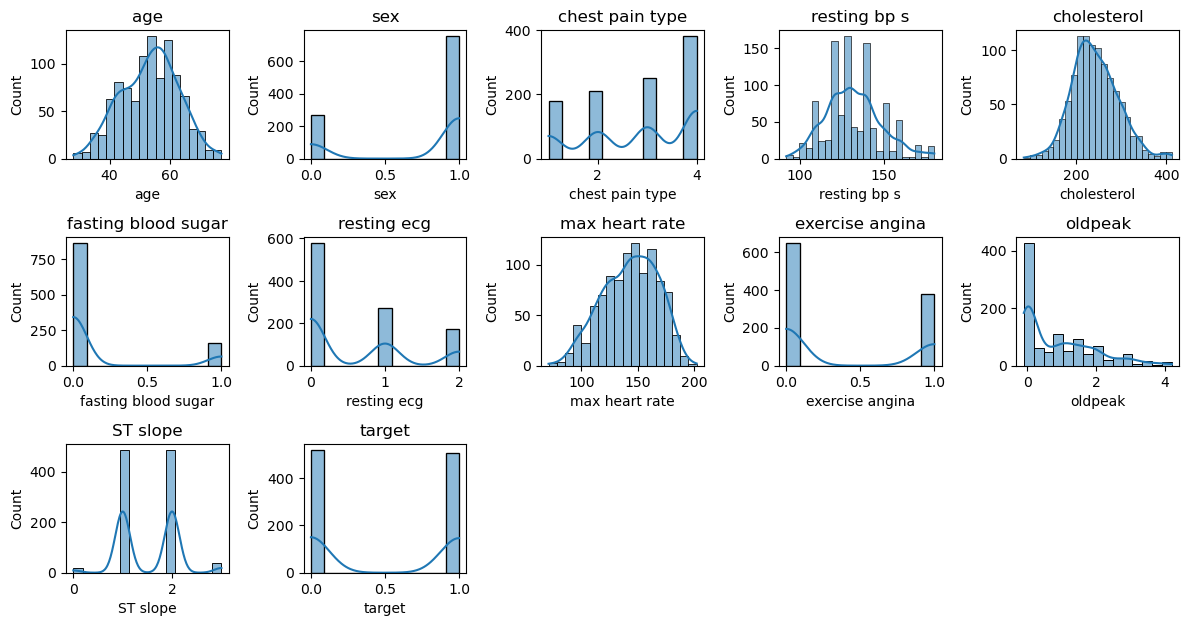

In [43]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

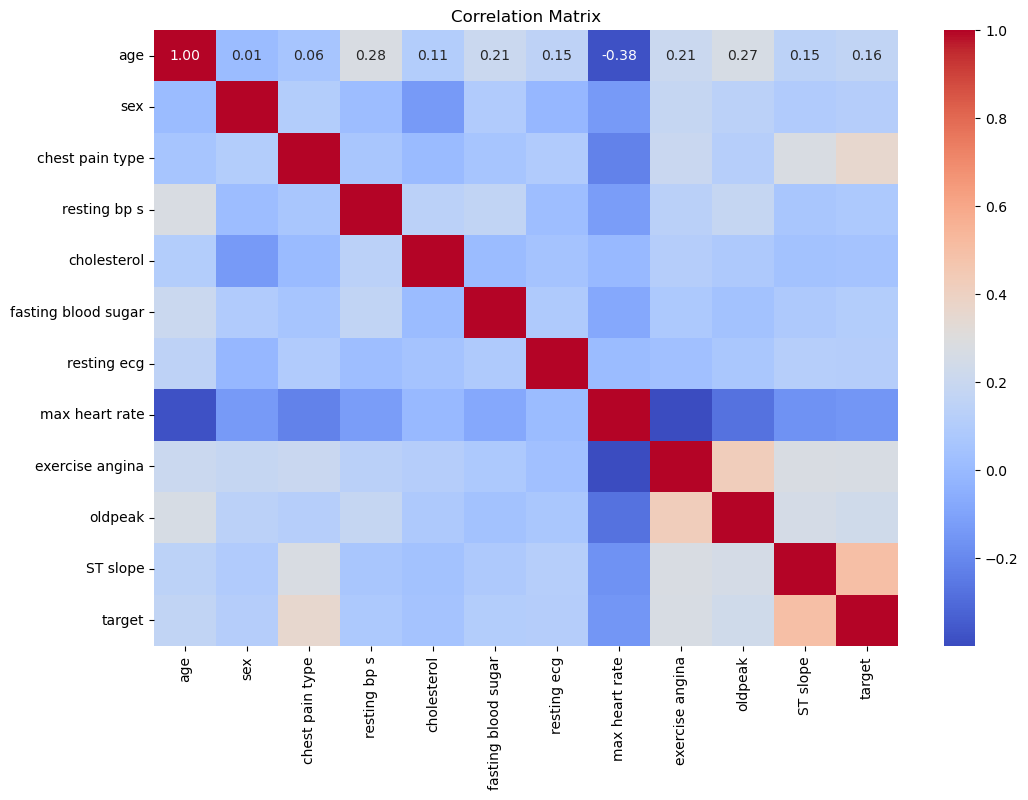

In [45]:
# Plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Moderate positive correlation
1. chest pain type - target
2. exercise angina - oldpeak grp
3. ST slope - target

Moderate negative correlation
1. max heart rate grp - age grp
2. max heart rate grp - exercise angina

c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\purpl\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

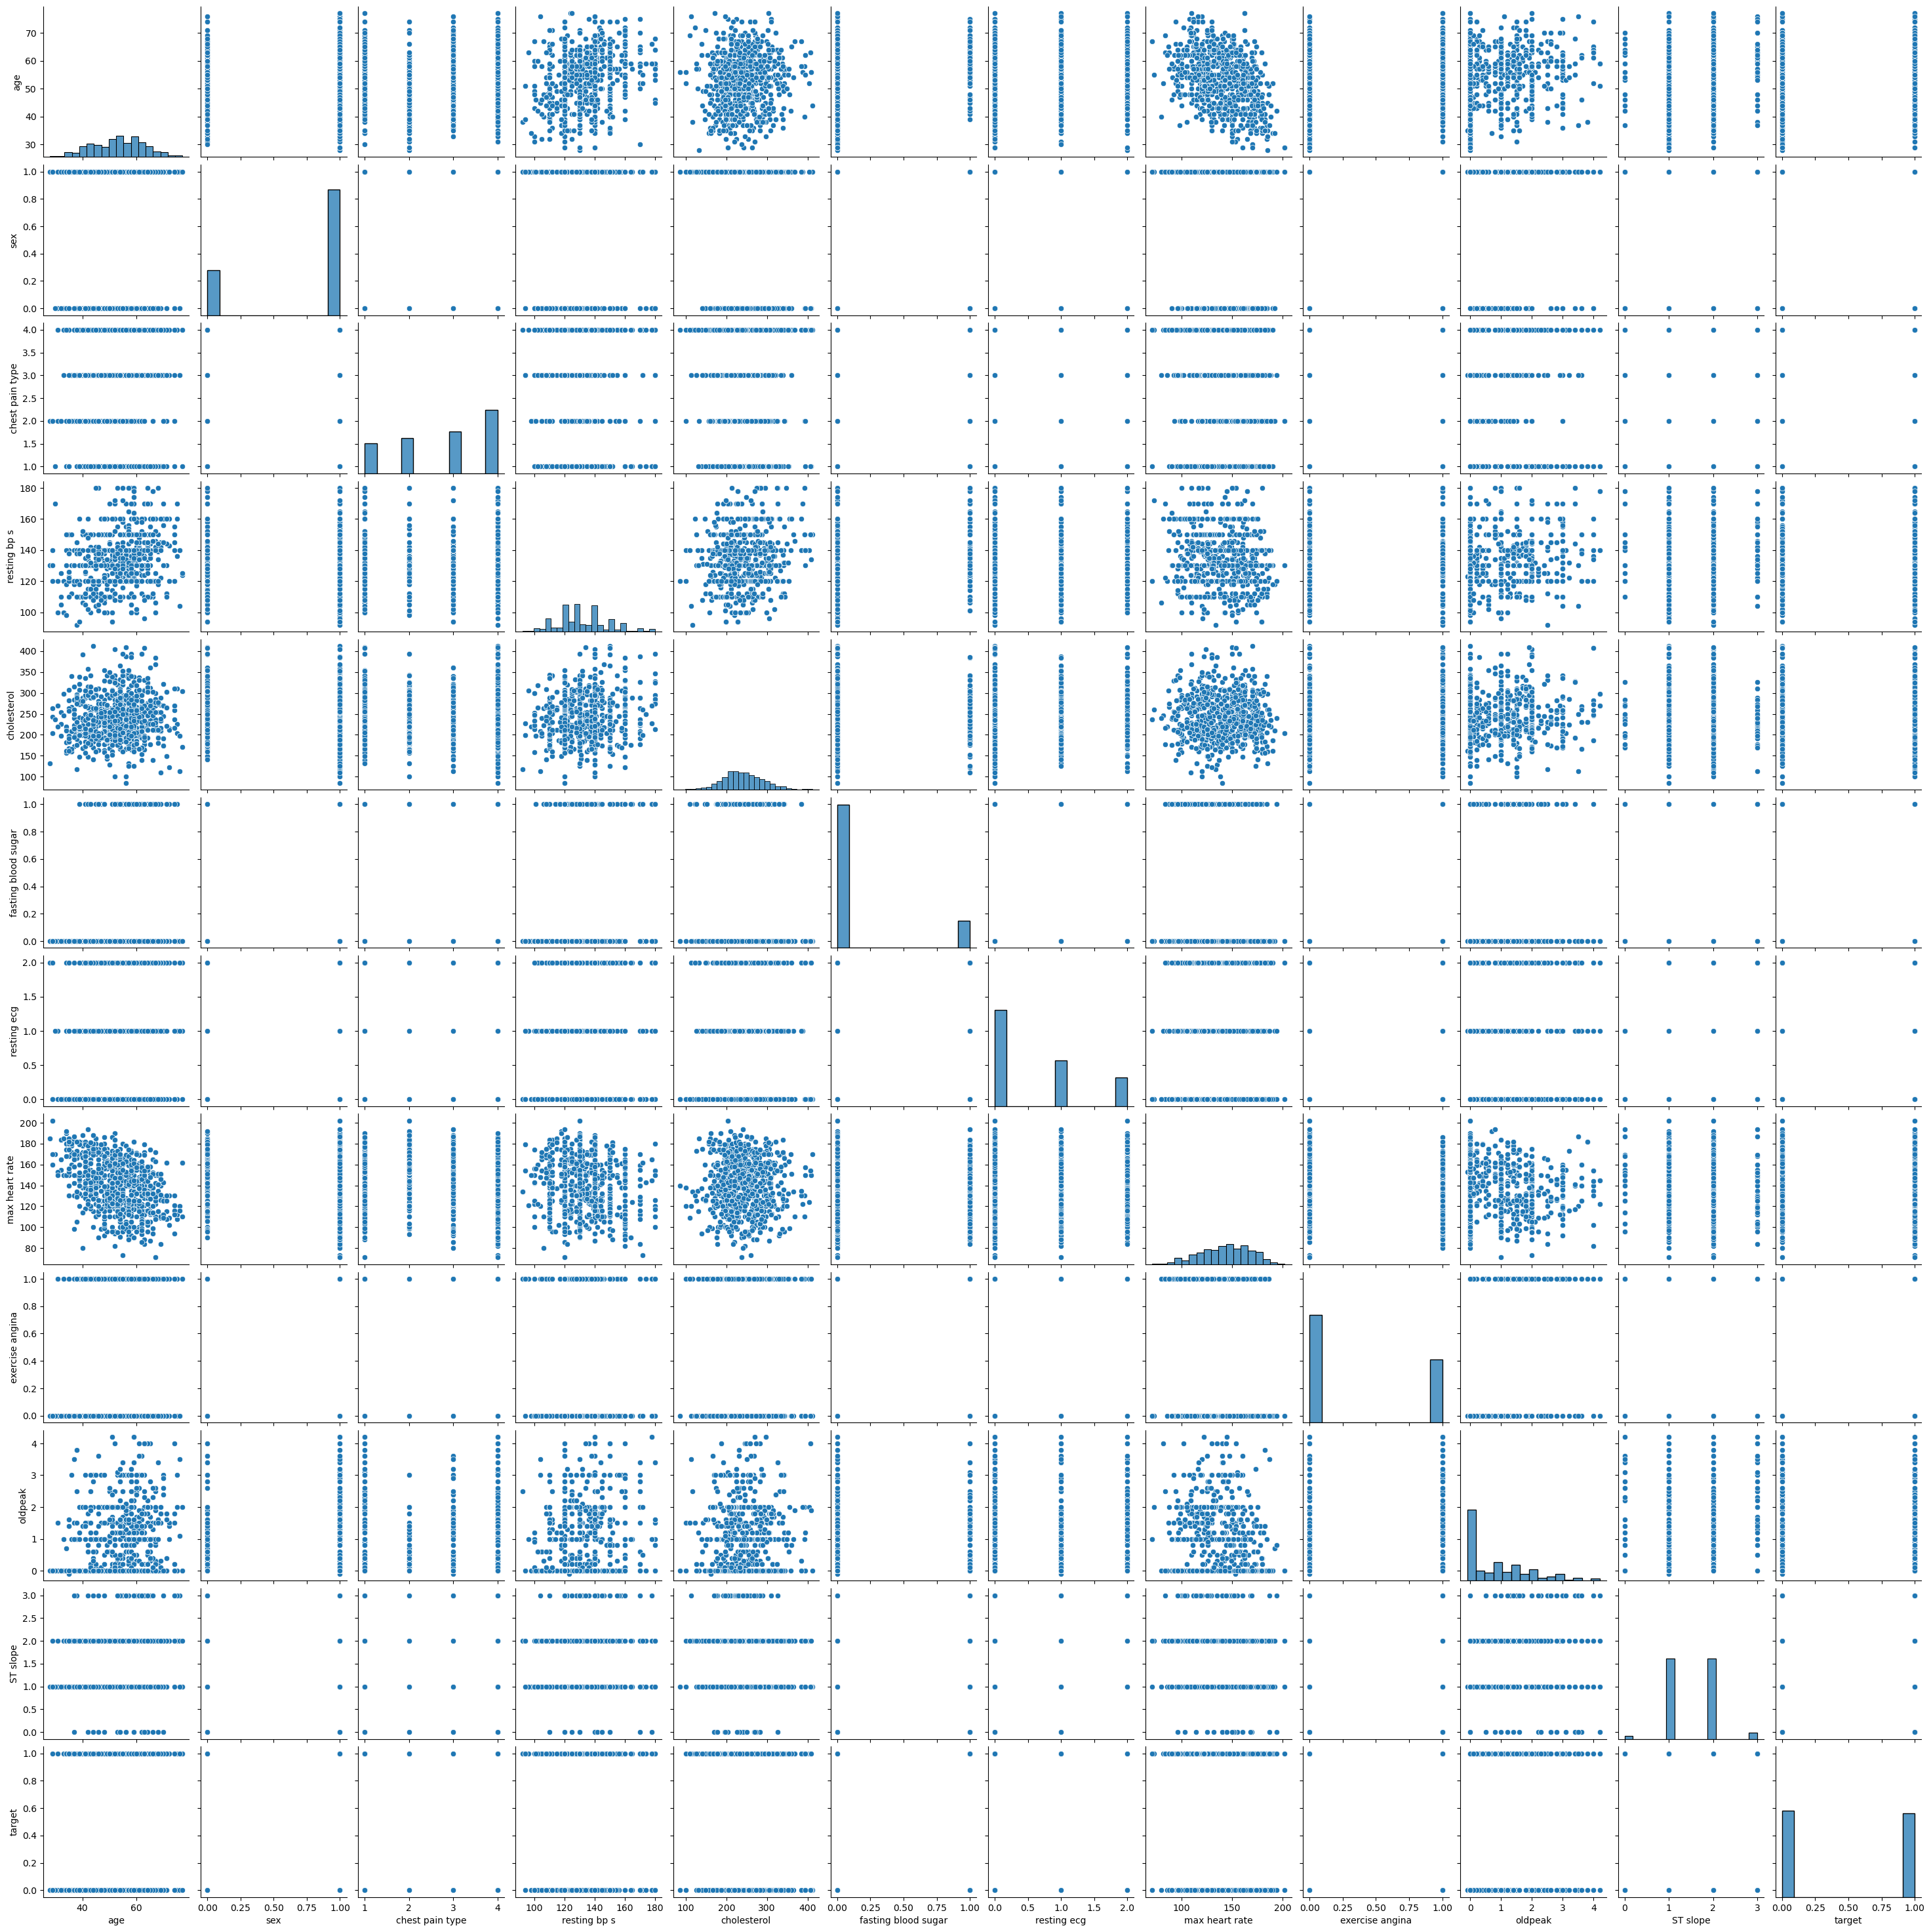

In [46]:
# Plot scatter and density plots
sns.pairplot(df)
plt.show()

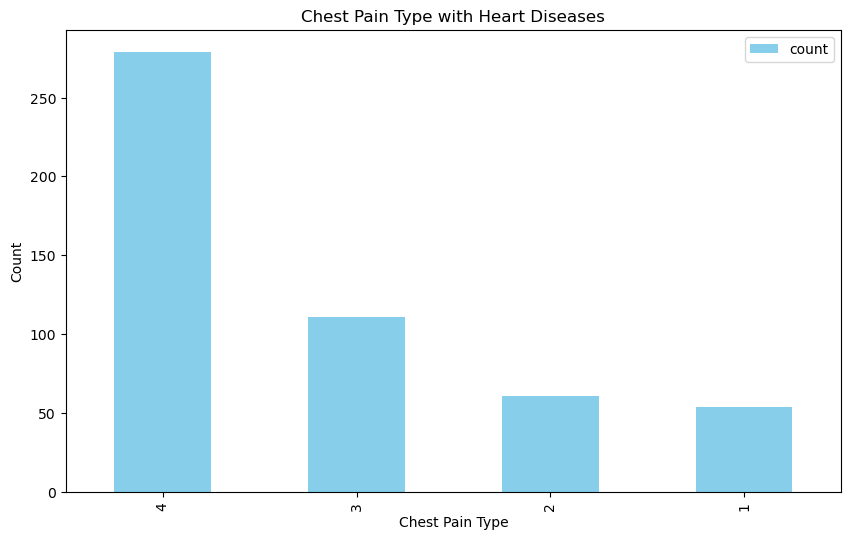

In [47]:
# Filter the DataFrame where target is equal to 1
target_1_df = df[df['target'] == 1]

# Count the occurrences of each age in the filtered DataFrame
cpt = target_1_df['chest pain type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cpt.plot(kind='bar', color='skyblue')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type with Heart Diseases')
plt.legend()
plt.show()


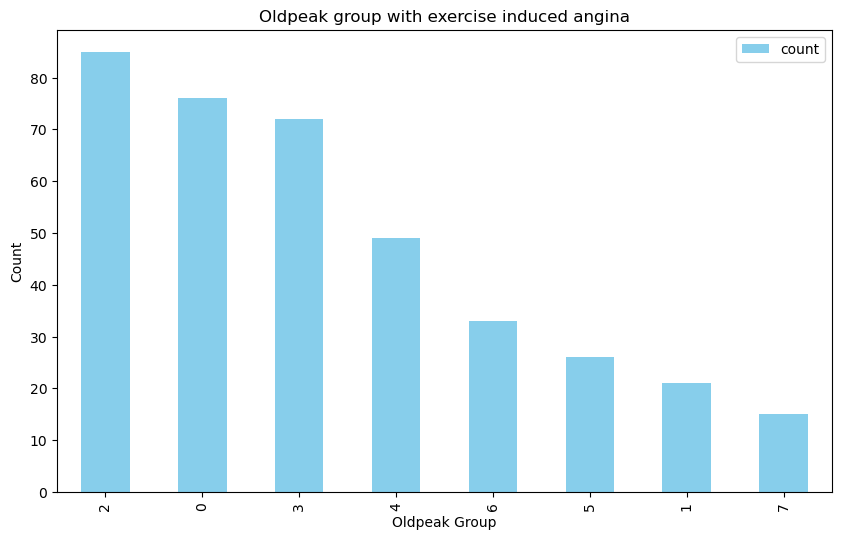

In [48]:
# Filter the DataFrame where exercise angina is equal to 1
target_1_df = df_group[df_group['exercise angina'] == 1]

# Count the occurrences of each oldpeak in the filtered DataFrame
age_counts = target_1_df['oldpeak_group'].value_counts()

# Find the age with the highest count of exercise angina equal to 1
most_common_age = age_counts.idxmax()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Oldpeak Group')
plt.ylabel('Count')
plt.title('Oldpeak group with exercise induced angina')
plt.legend()
plt.show()


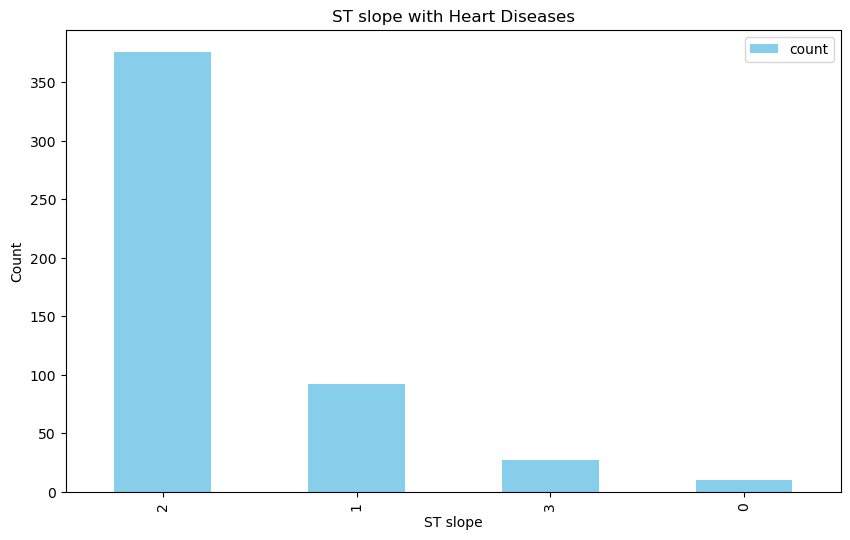

In [49]:
# Filter the DataFrame where target is equal to 1
target_1_df = df[df['target'] == 1]

# Count the occurrences of each ST slope in the filtered DataFrame
cpt = target_1_df['ST slope'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cpt.plot(kind='bar', color='skyblue')
plt.xlabel('ST slope')
plt.ylabel('Count')
plt.title('ST slope with Heart Diseases')
plt.legend()
plt.show()

Modeling

In [50]:
import matplotlib.pyplot as plt

# model metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#data pre-processing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# different machine learning models
import shap
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [51]:
y=df['target']
X=df.drop('target',axis=1)

In [52]:
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1018,68,0,3,120,211,0,0,115,0,1.5,1
1019,44,0,3,108,141,0,1,175,0,0.6,1
1020,52,1,1,128,255,0,1,161,1,0.0,2
1021,59,1,4,160,273,0,0,125,0,0.0,2


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [54]:
# Feature Scaling
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [55]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_importances = np.abs(logistic_model.coef_[0])

y_pred_logistic = logistic_model.predict(X_test_scaled)

In [56]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_importances = rf_model.feature_importances_

y_pred_rf = rf_model.predict(X_test_scaled)

In [57]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_importances = xgb_model.feature_importances_

y_pred_xgb = xgb_model.predict(X_test_scaled)

In [58]:
# SHAP for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# If binary classification, shap_values is a list of two arrays (one for each class)
if isinstance(shap_values, list):
    shap_importances = np.abs(shap_values).mean(axis=0)[1]  # Take the second array (for class 1)
else:
    shap_importances = np.abs(shap_values).mean(axis=0)  # Use directly if shap_values is already an array

In [59]:
# SVM
svm_model = svm.SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

In [60]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [61]:
# ANN
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_test_scaled)

Feature importance scores that indicate how much each feature contributes to the prediction.

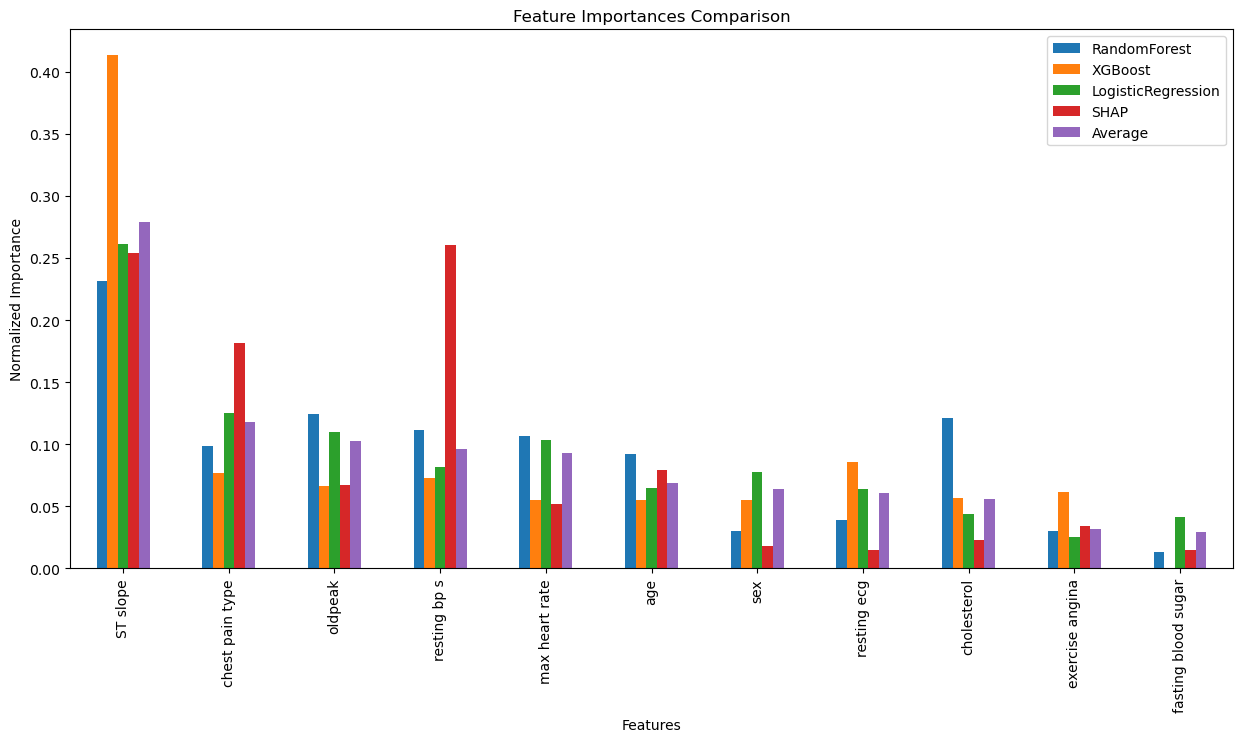

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rf_importances, xgb_importances, logistic_importances, and shap_importances are lists or arrays of feature importances

# Combine importances into a DataFrame
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LogisticRegression': logistic_importances,
    'SHAP': shap_importances
})

# Ensure the columns containing importances are numeric
numeric_columns = ['RandomForest', 'XGBoost', 'LogisticRegression', 'SHAP']
importances_df[numeric_columns] = importances_df[numeric_columns].apply(pd.to_numeric)

# Calculate the average importance excluding the 'Feature' column
importances_df['Average'] = importances_df[numeric_columns].mean(axis=1)

# Normalize importances for comparison
importances_df.set_index('Feature', inplace=True)
importances_df = importances_df / importances_df.sum()

# Sort by average importance
importances_df = importances_df.sort_values(by='Average', ascending=False)

# Plot combined importances
importances_df.plot(kind='bar', figsize=(15, 7))
plt.title('Feature Importances Comparison')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.show()


Test Accuracy of Model

In [63]:
# Evaluate Models
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.2f}")

In [64]:
print("Logistic Regression:")
evaluate_model(y_test, y_pred_logistic)

Logistic Regression:
Accuracy: 0.76
Precision: 0.75
Recall: 0.79
F1-Score: 0.77
AUC-ROC: 0.76


In [65]:
print("\nRandom Forest:")
evaluate_model(y_test, y_pred_rf)


Random Forest:
Accuracy: 0.78
Precision: 0.77
Recall: 0.80
F1-Score: 0.78
AUC-ROC: 0.78


In [66]:
print("\nXGBoost:")
evaluate_model(y_test, y_pred_xgb)


XGBoost:
Accuracy: 0.78
Precision: 0.75
Recall: 0.82
F1-Score: 0.78
AUC-ROC: 0.78


In [67]:
print("\nSVM:")
evaluate_model(y_test, y_pred_svm)


SVM:
Accuracy: 0.79
Precision: 0.77
Recall: 0.81
F1-Score: 0.79
AUC-ROC: 0.79


In [68]:
print("\nDecision Tree:")
evaluate_model(y_test, y_pred_dt)


Decision Tree:
Accuracy: 0.73
Precision: 0.72
Recall: 0.73
F1-Score: 0.73
AUC-ROC: 0.73


In [69]:
print("\nANN:")
evaluate_model(y_test, y_pred_ann)


ANN:
Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1-Score: 0.78
AUC-ROC: 0.78


Hyperparameter tuning

In [70]:
# SVM with hyperparameter tuning
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
svm_grid_search = GridSearchCV(svm.SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate SVM model
print("SVM Performance:")
evaluate_model(y_test, y_pred_svm)

SVM Performance:
Accuracy: 0.79
Precision: 0.78
Recall: 0.80
F1-Score: 0.79
AUC-ROC: 0.79


In [71]:
# XGBoost with hyperparameter tuning
xgb_param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 300]}
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train_scaled, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

print("XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

XGBoost Performance:
Accuracy: 0.79
Precision: 0.78
Recall: 0.81
F1-Score: 0.80
AUC-ROC: 0.79


In [72]:
# Random Forest with hyperparameter tuning
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20]}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)

Random Forest Performance:
Accuracy: 0.79
Precision: 0.77
Recall: 0.83
F1-Score: 0.80
AUC-ROC: 0.80


In [73]:
# ANN with hyperparameter tuning
ann_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)], 'max_iter': [1000, 2000, 3000]}
ann_grid_search = GridSearchCV(MLPClassifier(random_state=42), ann_param_grid, cv=5, scoring='accuracy')
ann_grid_search.fit(X_train_scaled, y_train)
best_ann_model = ann_grid_search.best_estimator_
y_pred_ann = best_ann_model.predict(X_test_scaled)

print("ANN Performance:")
evaluate_model(y_test, y_pred_ann)

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


ANN Performance:
Accuracy: 0.77
Precision: 0.75
Recall: 0.81
F1-Score: 0.78
AUC-ROC: 0.77


**Choose Random Forest**
In the context of heart disease prediction, where both precision and recall are important due to the consequences of both false positives and false negatives, the Random Forest model seems to be the most suitable choice among the options provided.

Balanced Precision and Recall: The Random Forest model has a precision of 0.77 and a recall of 0.83, indicating a good balance between minimizing false positives and false negatives. This balance is crucial in a medical context like heart disease prediction, where both types of errors have significant implications.

High F1-Score and AUC-ROC: The Random Forest model achieves an F1-Score of 0.80 and an AUC-ROC of 0.80, which are both robust performance metrics. The F1-Score considers both precision and recall, providing a single metric to evaluate the model's overall performance, while the AUC-ROC indicates the model's ability to distinguish between positive and negative cases.

Ensemble Method Reliability: Random Forest is an ensemble learning method that combines multiple decision trees, which tends to reduce overfitting and improve generalization performance. This robustness is valuable in medical applications where the model needs to generalize well to unseen data.

Feature Selection

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

# Initialize SelectKBest with the ANOVA F-value scoring function
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='linear')

# Train your SVM model using the selected features
svm_model.fit(X_train_selected, y_train)

# Evaluate model performance
svm_accuracy = svm_model.score(X_test_selected, y_test)
print("SVM Accuracy with Univariate Feature Selection:", svm_accuracy)


SVM Accuracy with Univariate Feature Selection: 0.7863247863247863


In [75]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)  # Choose the number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_rf_pca = rf_model.predict(X_test_pca)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf_pca)

Random Forest Performance:
Accuracy: 0.74
Precision: 0.75
Recall: 0.70
F1-Score: 0.73
AUC-ROC: 0.74


Feature selection doesn't help much on model's performance